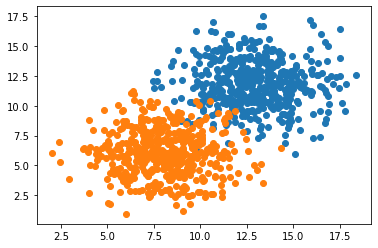

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
n_pts = 500
np.random.seed(0)
Xa = np.array([np.random.normal(13, 2, n_pts),
               np.random.normal(12, 2, n_pts)]).T
Xb = np.array([np.random.normal(8, 2, n_pts),
               np.random.normal(6, 2, n_pts)]).T

X = np.vstack((Xa, Xb))
Y = np.matrix(np.append(np.zeros(n_pts), np.ones(n_pts))).T

plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

In [3]:
model = Sequential()
model.add(Dense(units=1, input_shape=(2,), activation="sigmoid"))
adam = Adam(lr=0.1)
model.compile(adam, loss='binary_crossentropy', metrics=['accuracy'])
h = model.fit(x=X, y=Y, verbose=1, batch_size=50, epochs=10, shuffle="true")


Epoch 1/10
20/20 [==============================] - 0s 699us/step - loss: 0.7076 - accuracy: 0.6770
Epoch 2/10
20/20 [==============================] - 0s 795us/step - loss: 0.5255 - accuracy: 0.7310
Epoch 3/10
20/20 [==============================] - 0s 759us/step - loss: 0.3763 - accuracy: 0.8710
Epoch 4/10
20/20 [==============================] - 0s 797us/step - loss: 0.3116 - accuracy: 0.9330
Epoch 5/10
20/20 [==============================] - 0s 907us/step - loss: 0.2716 - accuracy: 0.9440
Epoch 6/10
20/20 [==============================] - 0s 1ms/step - loss: 0.2405 - accuracy: 0.9540
Epoch 7/10
20/20 [==============================] - 0s 654us/step - loss: 0.2121 - accuracy: 0.9590
Epoch 8/10
20/20 [==============================] - 0s 704us/step - loss: 0.1922 - accuracy: 0.9640
Epoch 9/10
20/20 [==============================] - 0s 1ms/step - loss: 0.1813 - accuracy: 0.9660
Epoch 10/10
20/20 [==============================] - 0s 1ms/step - loss: 0.1711 - accuracy: 0.9620


Text(0.5, 1.0, 'Metric Graph')

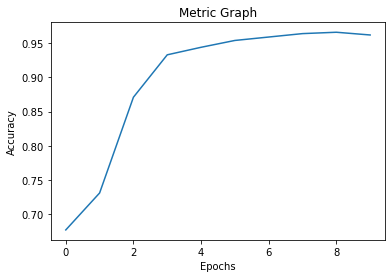

In [6]:
plt.plot(h.history['accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title("Metric Graph")


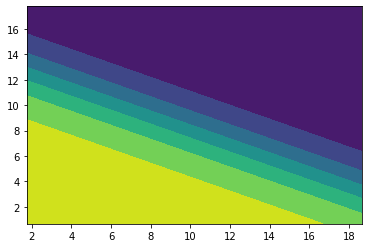

In [8]:
def plot_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:,0]) - 0.25, max(X[:,0]) + 0.25)
    y_span = np.linspace(min(X[:,1]) - 0.25, max(X[:,1]) + 0.25)
    xx, yy = np.meshgrid(x_span, y_span)
    grid = np.c_[xx.ravel(), yy.ravel()]
    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

plot_decision_boundary(X, Y, model)